In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from procan_connectome.data_ingestion.ingest_data import get_dataset
from procan_connectome.data_processing.pipeline import get_pipeline

_SWEEP_ID="6uankjg8"

plt.style.use("../plots/apa_plot_style.mplstyle")
feature_map_df = pd.read_csv("../data/AAL_description.csv")

In [2]:
results = pd.read_csv("../processed_results.csv", index_col="id")
results = results.loc[(results["state"].isin(["finished"])) & (results["sweep_id"]==_SWEEP_ID)]
results.shape

(144, 80)

In [3]:
independent_cols = ["model", "dataset", "pipeline.rfecv", "loocv.balance_classes", "pipeline.power_transform", "pipeline.standard_scale"]

In [4]:
results.groupby(independent_cols).agg(["mean", "std", "count"])[["Accuracy", "F1-Score (macro)"]].sort_values(by=("F1-Score (macro)", "mean"), ascending=False).dropna().iloc[:20].iloc[0]*100

/tmp/ipykernel_3508/1517668994.py:1: FutureWarning: ['Confusion Matrix._type', 'Confusion Matrix.caption', 'Confusion Matrix.format', 'Confusion Matrix.path', 'Confusion Matrix.sha256', 'Top 10 Feature Importances._type', 'Top 10 Feature Importances.caption', 'Top 10 Feature Importances.format', 'Top 10 Feature Importances.path', 'Top 10 Feature Importances.sha256', 'Top 50 Feature Importances._type', 'Top 50 Feature Importances.caption', 'Top 50 Feature Importances.format', 'Top 50 Feature Importances.path', 'Top 50 Feature Importances.sha256', 'config', 'labels_dict.0', 'labels_dict.1', 'labels_dict.2', 'labels_dict.3', 'labels_dict.4', 'loocv.scoring', 'name', 'paths.data', 'paths.logs', 'paths.plot', 'paths.root', 'paths.t12_data', 'pipeline.ignore_features', 'state', 'summary', 'sweep_id', 'tags', 'wandb.dir', 'wandb.entity', 'wandb.name', 'wandb.project', 'wandb.start_method'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Dr

Accuracy          mean      86.394558
                  std        3.117398
                  count    300.000000
F1-Score (macro)  mean      84.123381
                  std        4.614119
                  count    300.000000
Name: (rf, longitudinal, True, True, True, True), dtype: float64

In [5]:
run_ids = results.loc[
            (results["model"]=="rf") &
            (results["dataset"]=="longitudinal") & 
            (results["loocv.balance_classes"]==True) & 
            (results["pipeline.power_transform"]==True) & 
            (results["pipeline.standard_scale"]==True) 
        ].index
run_ids

Index(['n2n780zl', 'f8sjm7rl', 'ericil13'], dtype='object', name='id')

In [6]:
results.loc[run_ids]

,Accuracy,Confusion Matrix._type,Confusion Matrix.caption,Confusion Matrix.format,Confusion Matrix.height,Confusion Matrix.path,Confusion Matrix.sha256,Confusion Matrix.size,Confusion Matrix.width,F1-Score (macro),...,random_state,state,summary,sweep_id,tags,wandb.dir,wandb.entity,wandb.name,wandb.project,wandb.start_method
id,,,,,,,,,,,,,,,,,,,,,
n2n780zl,0.897959,image-file,Confusion Matrix,png,995.0,media/images/Confusion Matrix_100_34e160d5efe8...,34e160d5efe89cd4e2ba2af50a1b7402be527239a9c78c...,65525.0,1244.0,0.886269,...,42,finished,"{'_step': 102, 'Accuracy': 0.8979591836734694,...",6uankjg8,[],/work/souza_lab/lasby/procan_connectome/data/w...,mklasby,rf_longitudinal_gsTrue_ssTrue_rfecvTrue_balanc...,procan,thread
f8sjm7rl,0.857143,image-file,Confusion Matrix,png,995.0,media/images/Confusion Matrix_100_3353635c1f1d...,3353635c1f1d3b63a78a80e9f0eebf3d09ddbb64c18889...,67725.0,1244.0,0.843372,...,2078,finished,"{'F1-Score (macro)': 0.8433717712866994, 'Top ...",6uankjg8,[],/work/souza_lab/lasby/procan_connectome/data/w...,mklasby,rf_longitudinal_gsTrue_ssTrue_rfecvTrue_balanc...,procan,thread
ericil13,0.836735,image-file,Confusion Matrix,png,995.0,media/images/Confusion Matrix_100_cfa60b1d7e5e...,cfa60b1d7e5e1f83ff49ccd6b70f29a305b62843c18c9f...,67618.0,1244.0,0.794061,...,8746,finished,"{'cv_iter_min': 0.4003745913505554, 'Confusion...",6uankjg8,[],/work/souza_lab/lasby/procan_connectome/data/w...,mklasby,rf_longitudinal_gsTrue_ssTrue_rfecvTrue_balanc...,procan,thread


In [7]:
# best run id: n2n780zl seed 42, 

In [8]:
import pickle


with open("../data/trained_models/rf_longitudinal_gsTrue_ssTrue_rfecvTrue_balancedTrue_seed42.pkl", "rb") as handle:
    model = pickle.load(handle)
model

LOOCV_Wrapper(X=              fun_HM_0  fun_Sync_0  fun_Assortativity_0  fun_Hierarchy_0  \
Subject Site                                                               
3       2     0.054797  -47.674003            15.904290         1.615296   
4       1     0.045966  -67.997504            16.817162         1.901156   
6       2     0.122860  -23.616987            15.585781        -2.423241   
7       2     0.097789  -44.957825            20.918812        -2.458030   
9       1     0.082430  -70.652915            17.241499         1.215548   
...                ...         ...                  ...              ...   
195     1     0.038584  -39.545460            14.481175        -1.026793   
197     1     0.034671  -58.628287            30.880...
                                       ('featureselectiontransformer',
                                        FeatureSelectionTransformer(ignore_features=[None],
                                                                    transformer=RFECV(estimator=RandomForestClassifier(random_state=42),
                                                                                      min_features_to_select=10,
                                                                                      n_jobs=-1,
                                                                                      step=0.1,
                                                                                      verbose=10)))]),
              save_feature_importance=True, scoring='f1_macro',
              y=Subject  Site
4        1       1.0
9        1       3.0
14       1       4.0
15       1       2.0
16       1       1.0
                ... 
28       2       0.0
30       2       0.0
32       2       1.0
34       2       0.0
42       2       1.0
Name: Group, Length: 98, dtype: float64)

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pathlib
from hydra import compose, initialize
import dotenv

import numpy as np
import math
from functools import partial, reduce

from procan_connectome import config  # T0_DATA_PATH, T12_DATA_PATH, DATA_PATH
from procan_connectome.data_ingestion.ingest_data import get_dataset

In [10]:
with initialize("../configs", version_base="1.2.0"):
    cfg = compose(
        "config.yaml"
    )
dotenv.load_dotenv("../.env", override=True)
_PLOT_PATH = pathlib.Path('/home/user/procan_connectome/plots/')

In [11]:
cfg

{'SMOKE_TEST': False, 'wandb': {'name': '${model}_${dataset}_gs${loocv.perform_grid_search}_ss${pipeline.standard_scale}_rfecv${pipeline.rfecv}_balanced${loocv.balance_classes}_seed${random_state}', 'entity': 'mklasby', 'project': 'procan', 'start_method': 'thread', 'dir': '${paths.data}/wandb'}, 'model': 'rf', 'dataset': 'longitudinal', 'n_jobs': -1, 'random_state': 42, 'drop_na': True, 'global_only': False, 'loocv': {'perform_grid_search': True, 'scoring': 'f1_macro', 'balance_classes': True, 'n_samples': None, 'single_label_upsample': None, 'cv': 5, 'save_feature_importance': True, 'smoke_test': '${SMOKE_TEST}'}, 'pipeline': {'standard_scale': True, 'power_transform': True, 'rfecv': True, 'ignore_features': [None]}, 'paths': {'root': '${oc.env:BASE_PATH}', 'data': '${paths.root}/data', 't12_data': '${paths.data}/t12-updated', 'plot': '${paths.root}/plots', 'logs': '${paths.data}/logs'}, 'labels_dict': {0: 'HC', 1: 'Stage_0', 2: 'Stage_1a', 3: 'Stage_1b', 4: 'Transition'}}

In [12]:
from procan_connectome.utils.result_plots import _generate_confusion_matrix, plot_feature_importance

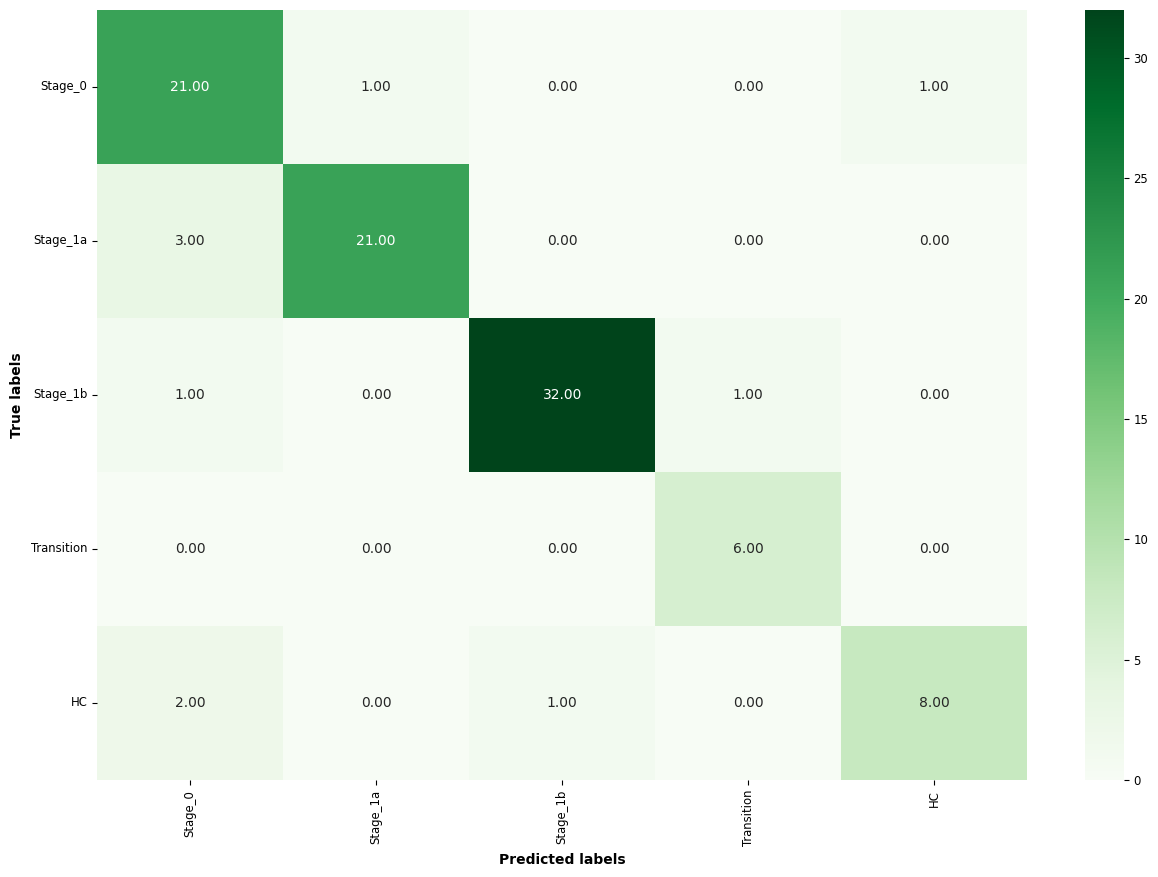

In [13]:
cm_fig = _generate_confusion_matrix(cfg, model.results_df_, plot_path=None)
ax = cm_fig.axes
ax[0].set_title(None)
cm_fig.savefig(_PLOT_PATH / "cm.pdf", bbox_inches="tight")
cm_fig.savefig(_PLOT_PATH / "cm.svg", bbox_inches="tight")

In [14]:
### Feature Importances

In [15]:

import textwrap
def axis_title_wrapper(name, max_l=20):
    try:
        new_name = "\n".join(textwrap.wrap(name, width=max_l))
        return new_name
    except:
        return name
    

 
def feature_name_map(name, feature_map_df=feature_map_df, delim=" ", wrap_len=None):
    try:
        _type_map = {"str": "DTI", "fun": "fMRI"}
        _node_map = {
            "Bc": f"betweenness{delim}centrality",
            "Dc": f"degree{delim}centrality",
            "Nsp": f"nodal{delim}shortest{delim}path",
            "Ne": f"nodal{delim}efficiency",
            "Pc": f"participant{delim}coefficient",
            "Ncc": f"nodal{delim}clustering{delim}coefficient",
            "Nle": f"nodal{delim}local{delim}efficiency",
            }
        _period_map = {'0': "baseline", '1': "follow-up"}
        name_comps = name.split("_")
        if len(name_comps) != 4:
            return name
        scan_type, node_metric, region, period = name_comps
        scan_type = _type_map[scan_type]
        node_metric = _node_map[node_metric]
        period = _period_map[period]
        if region[0]=="V":
            region = region[1:]
        region = int(region)
        if region %2 == 0:
            region_idx = region//2
            region_hemispehre = "L"
        else:
            region_idx = (region+1)//2
            region_hemispehre="R"
        region = feature_map_df.iloc[region_idx]["Regions"]
        region = region.lower()
        region = region.split(" ")
        region = delim.join(region)
        converted_name = delim.join(
                [scan_type, node_metric, region, region_hemispehre, period]
            )
        if wrap_len is not None:
            return axis_title_wrapper(converted_name, max_l=wrap_len)
        return converted_name
    except:
        return name


name = "str_Bc_V63_0"
feature_name_map(name, feature_map_df, delim=" ", wrap_len=30)
    
    

'DTI betweenness centrality\nangular gyrus R baseline'

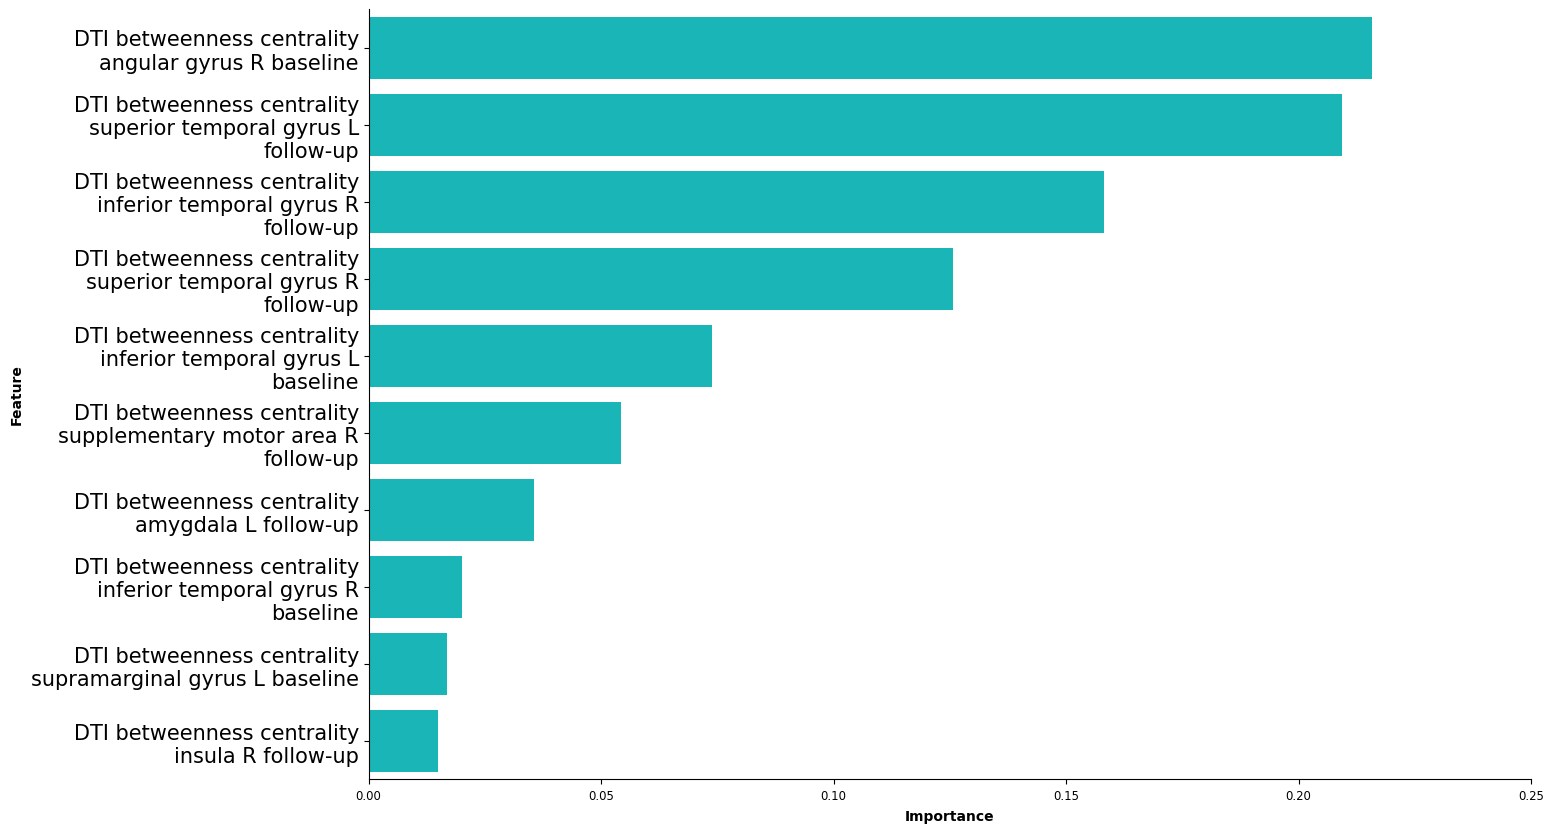

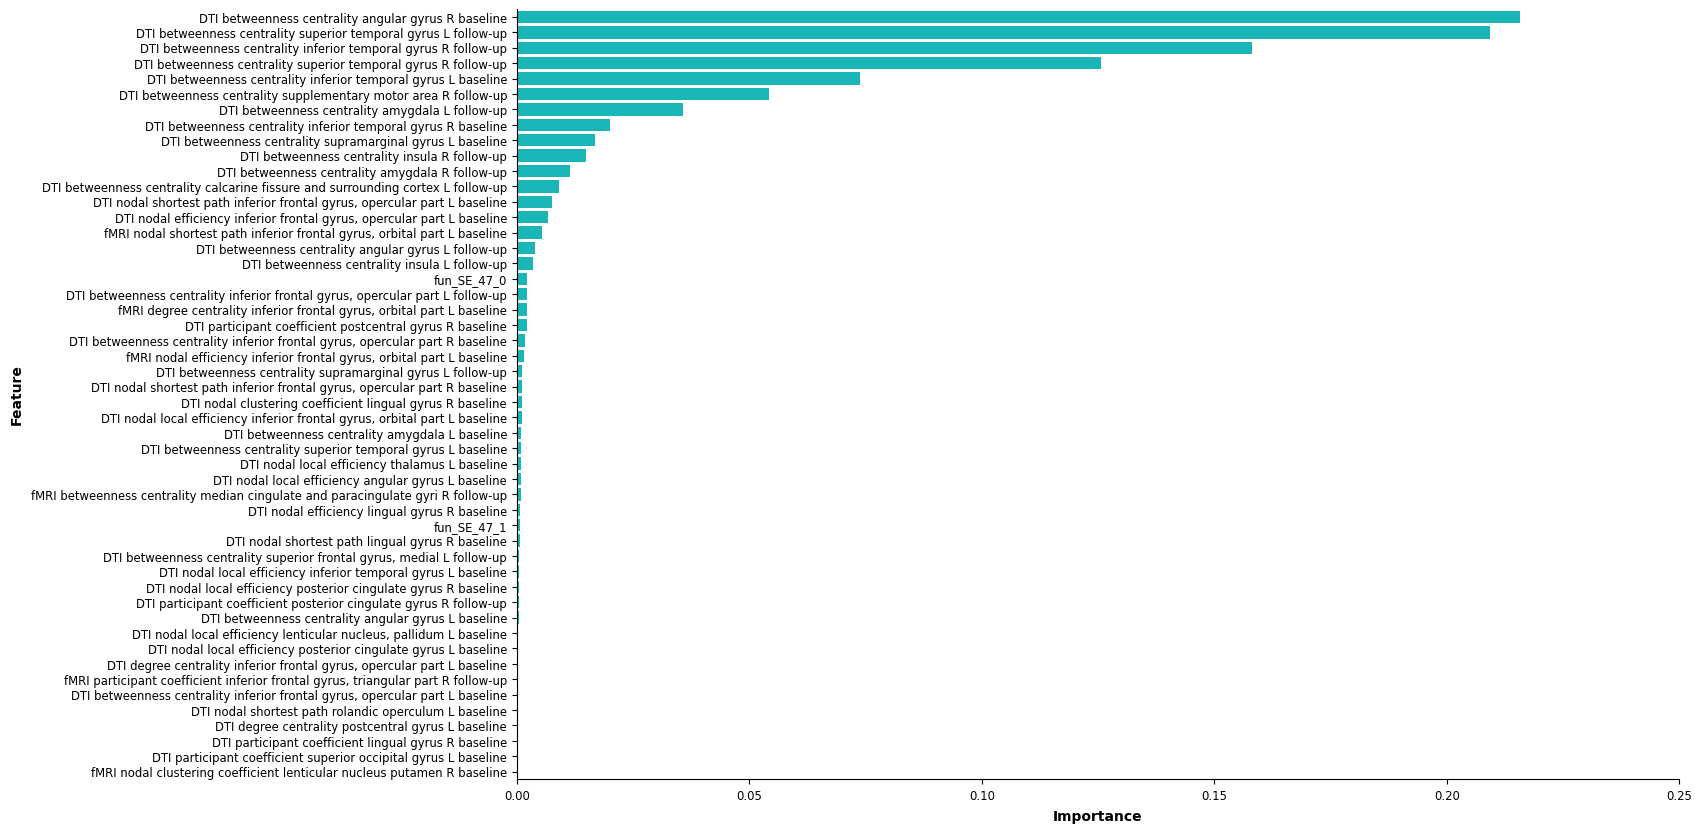

In [16]:
feature_importances_df = (
                model.importances_.fillna(0).mean(axis=1).rename("Importance")
            )
feature_importances_df = feature_importances_df.rename(lambda name: feature_name_map(name, wrap_len=30))
fi_fig = plot_feature_importance(
    feature_importances_df,
    "Top 10 Features",
    feature_col="Feature",
    importance_col="Importance",
    n_features=10,
    plot_path=None,
)
ax = fi_fig.axes
ax[0].tick_params(axis="y", labelsize=15)

ax[0].set_title(None)
fi_fig.savefig(_PLOT_PATH / "apa-top-10-features.pdf", bbox_inches="tight")
fi_fig.savefig(_PLOT_PATH / "apa-top-10-features.svg", bbox_inches="tight")

feature_importances_df = (
                model.importances_.fillna(0).mean(axis=1).rename("Importance")
            )
feature_importances_df = feature_importances_df.rename(feature_name_map)

fi_fig = plot_feature_importance(
    feature_importances_df,
    "Top 50 Features",
    feature_col="Feature",
    importance_col="Importance",
    n_features=50,
    plot_path=None,
)
ax = fi_fig.axes
ax[0].set_title(None)
fi_fig.savefig(_PLOT_PATH / "apa-top-50-features.pdf", bbox_inches="tight")
fi_fig.savefig(_PLOT_PATH / "apa-top-50-features.svg", bbox_inches="tight")

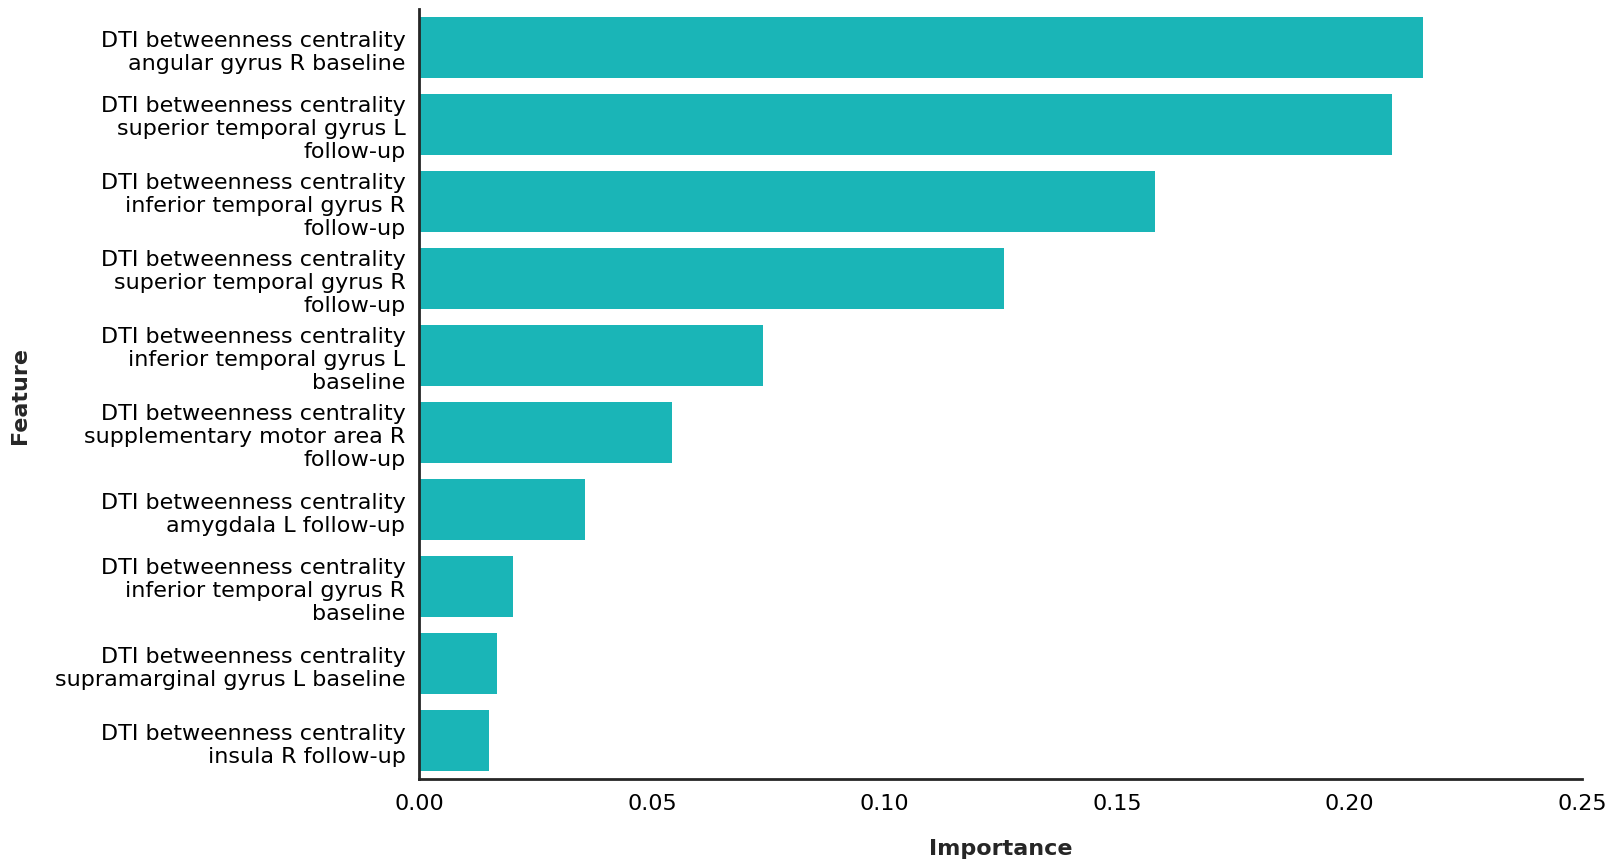

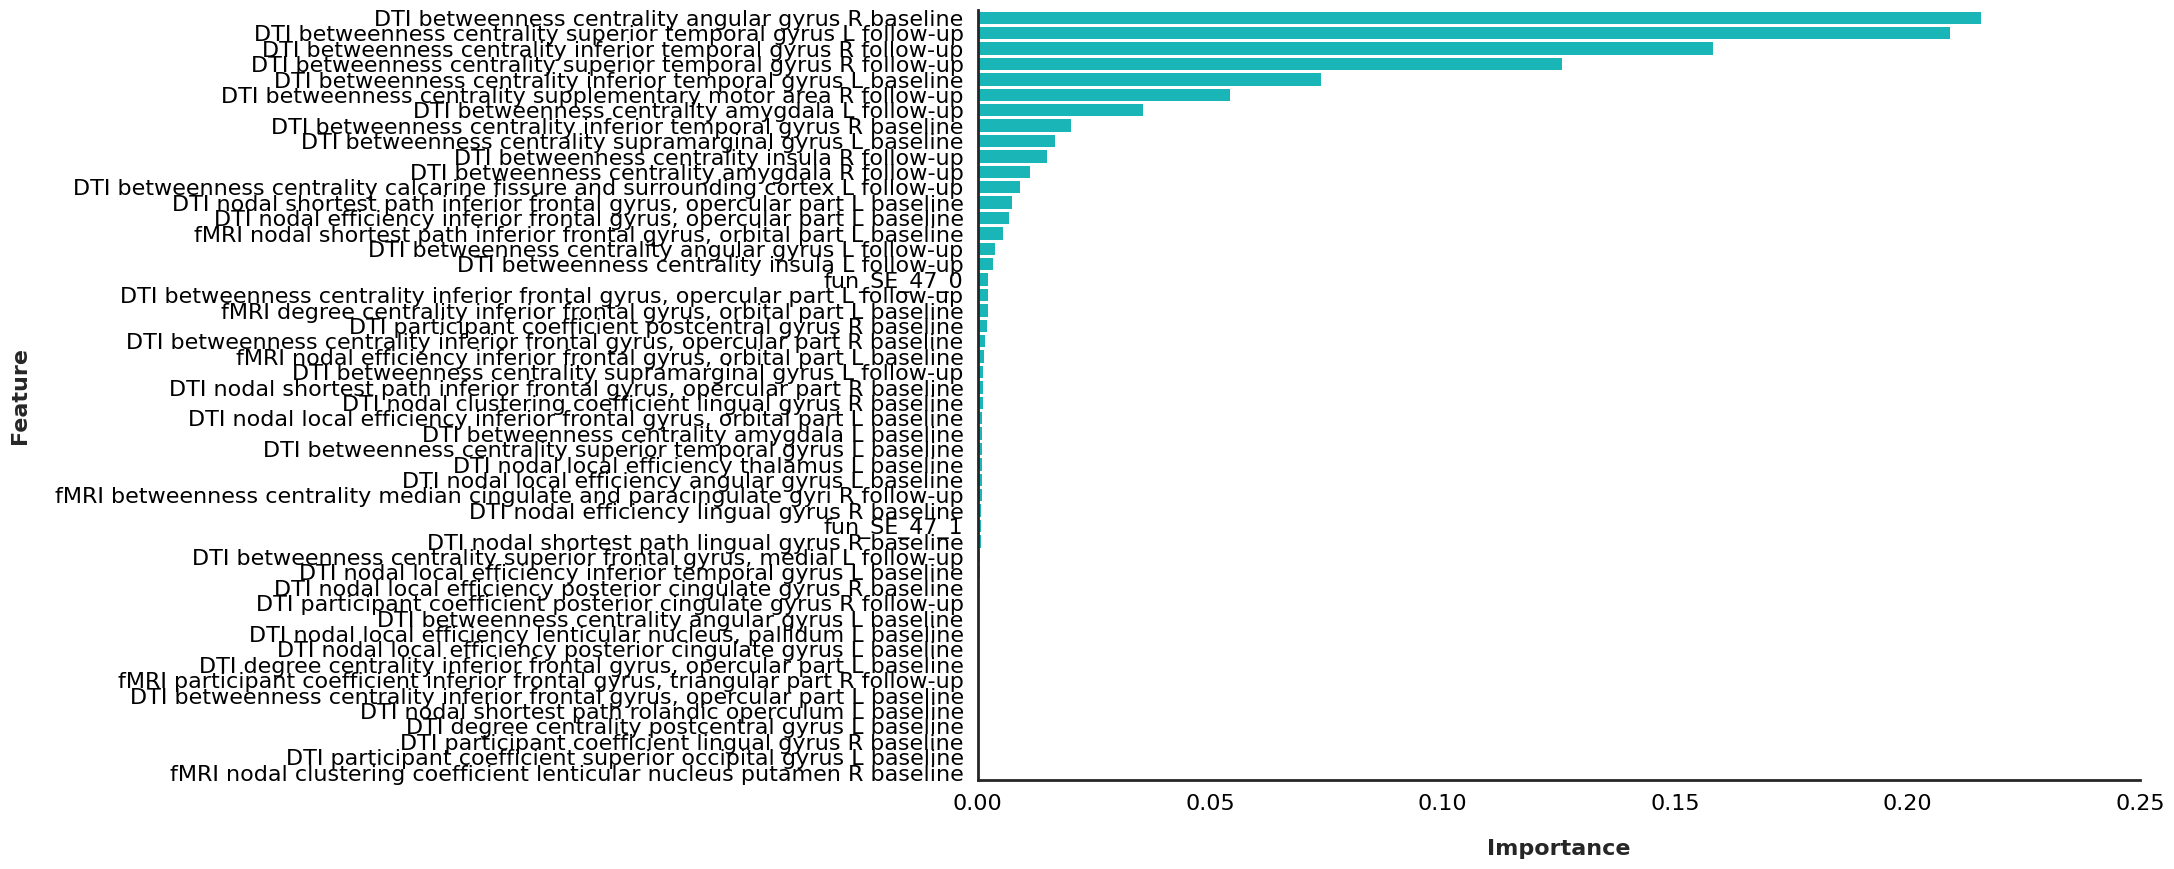

In [17]:
plt.style.use("../plots/plt_plot_style.mplstyle")

feature_importances_df = (
                model.importances_.fillna(0).mean(axis=1).rename("Importance")
            )
feature_importances_df = feature_importances_df.rename(lambda name: feature_name_map(name, wrap_len=30))

fi_fig = plot_feature_importance(
    feature_importances_df,
    "Top 10 Features",
    feature_col="Feature",
    importance_col="Importance",
    n_features=10,
    plot_path=None,
)
ax = fi_fig.axes
ax[0].set_title(None)
fi_fig.savefig(_PLOT_PATH / "top-10-features.pdf", bbox_inches="tight")
fi_fig.savefig(_PLOT_PATH / "top-10-features.svg", bbox_inches="tight")

feature_importances_df = (
                model.importances_.fillna(0).mean(axis=1).rename("Importance")
            )
feature_importances_df = feature_importances_df.rename(feature_name_map)

fi_fig = plot_feature_importance(
    feature_importances_df,
    "Top 50 Features",
    feature_col="Feature",
    importance_col="Importance",
    n_features=50,
    plot_path=None,
)
ax = fi_fig.axes
ax[0].set_title(None)
fi_fig.savefig(_PLOT_PATH / "top-50-features.pdf", bbox_inches="tight")
fi_fig.savefig(_PLOT_PATH / "top-50-features.svg", bbox_inches="tight")


In [18]:
import pickle
feature_importances_df = (
                model.importances_.fillna(0).mean(axis=1).rename("Importance")
            )

with open("../data/trained_models/rf_longitudinal_gsTrue_ssTrue_rfecvTrue_balancedTrue_seed8746.pkl", "rb") as handle:
    model_8746 = pickle.load(handle)

with open("../data/trained_models/rf_longitudinal_gsTrue_ssTrue_rfecvTrue_balancedTrue_seed2078.pkl", "rb") as handle:
    model_2078 = pickle.load(handle)

In [19]:
feature_importances_df_2 = (
                model_8746.importances_.fillna(0).mean(axis=1).rename("Importance")
            )

feature_importances_df_3 = (
                model_2078.importances_.fillna(0).mean(axis=1).rename("Importance")
            )

In [20]:
global_importances = model.importances_.join(model_8746.importances_, lsuffix="_2").join(model_2078.importances_, lsuffix="_3")
global_importances_df = feature_importances_df_2 = (
                global_importances.fillna(0).mean(axis=1).rename("Importance")
            )
global_importances_df.sort_values(ascending=False)

Feature
str_Bc_V63_0     0.213725
str_Bc_V80_1     0.209195
str_Bc_V87_1     0.161014
str_Bc_V79_1     0.120417
str_Bc_V88_0     0.077678
                   ...   
fun_Nle_V89_1    0.000000
fun_Nle_V8_0     0.000000
fun_Nle_V8_1     0.000000
fun_Nle_V90_0    0.000000
str_Sync_1       0.000000
Name: Importance, Length: 2716, dtype: float64

In [21]:
# Total number of features used, all seeds all folds
global_importances_df.shape[0] - (global_importances_df==0).sum() 

73

In [22]:
common_top_10 = []

def get_top_x(series, x):
    return series.sort_values(ascending=False).iloc[:x].index

top_10  = get_top_x(feature_importances_df, 10)


for feature in top_10:
    if feature in get_top_x(feature_importances_df_2, 10) and feature in get_top_x(feature_importances_df_3, 10):
        common_top_10.append(feature)
common_top_10

['str_Bc_V63_0',
 'str_Bc_V80_1',
 'str_Bc_V87_1',
 'str_Bc_V79_1',
 'str_Bc_V88_0',
 'str_Bc_V17_1',
 'str_Bc_V40_1',
 'str_Bc_V87_0',
 'str_Bc_V27_1']

In [23]:
common_top_50 = []
top_50 = get_top_x(feature_importances_df, 50)
for feature in top_50:
    if feature in get_top_x(feature_importances_df_2, 50) and feature in get_top_x(feature_importances_df_3, 50):
        common_top_50.append(feature)
len(common_top_50)

39

In [24]:
top_10

Index(['str_Bc_V63_0', 'str_Bc_V80_1', 'str_Bc_V87_1', 'str_Bc_V79_1',
       'str_Bc_V88_0', 'str_Bc_V17_1', 'str_Bc_V40_1', 'str_Bc_V87_0',
       'str_Bc_V62_0', 'str_Bc_V27_1'],
      dtype='object', name='Feature')

In [25]:
common_top_10

['str_Bc_V63_0',
 'str_Bc_V80_1',
 'str_Bc_V87_1',
 'str_Bc_V79_1',
 'str_Bc_V88_0',
 'str_Bc_V17_1',
 'str_Bc_V40_1',
 'str_Bc_V87_0',
 'str_Bc_V27_1']

In [26]:
common_top_50

['str_Bc_V63_0',
 'str_Bc_V80_1',
 'str_Bc_V87_1',
 'str_Bc_V79_1',
 'str_Bc_V88_0',
 'str_Bc_V17_1',
 'str_Bc_V40_1',
 'str_Bc_V87_0',
 'str_Bc_V62_0',
 'str_Bc_V27_1',
 'str_Bc_V39_1',
 'str_Bc_V42_1',
 'str_Nsp_V10_0',
 'str_Ne_V10_0',
 'fun_Nsp_V14_0',
 'str_Bc_V64_1',
 'str_Bc_V28_1',
 'fun_SE_47_0',
 'str_Bc_V10_1',
 'fun_Dc_V14_0',
 'str_Pc_V55_0',
 'str_Bc_V9_0',
 'fun_Ne_V14_0',
 'str_Bc_V62_1',
 'str_Nsp_V9_0',
 'str_Ncc_V45_0',
 'str_Nle_V14_0',
 'str_Bc_V40_0',
 'str_Bc_V80_0',
 'str_Nle_V76_0',
 'str_Nle_V64_0',
 'str_Nsp_V45_0',
 'str_Bc_V22_1',
 'str_Nle_V88_0',
 'str_Nle_V33_0',
 'str_Bc_V64_0',
 'fun_Pc_V11_1',
 'str_Bc_V10_0',
 'str_Pc_V45_0']

In [27]:
results.loc["n2n780zl"][["drop_na", "global_only", "dataset", "loocv.cv"]]

drop_na                True
global_only           False
dataset        longitudinal
loocv.cv                  5
Name: n2n780zl, dtype: object

In [28]:
# Load dataset
df = get_dataset(dataset_type="longitudinal", drop_na=True, global_only=False)
X, y = df.drop(columns=["Group"]), df["Group"]

# Transform data except feature selection
cfg_no_rfecv = cfg
cfg_no_rfecv.pipeline.rfecv=False
pipe = get_pipeline(cfg_no_rfecv, model.estimator)
X_t = pipe.fit_transform(X,y)



# Join dataset with targets for easy manipulation. Rename group IDs to stings
df_T = X_t.join(y)
df_T["Group_idx"] = df_T["Group"]
df_T["Group"] = df_T["Group_idx"].map(cfg.labels_dict)
df_T.shape

(98, 2718)

In [29]:
top_10_features=feature_importances_df.sort_values(ascending=False)[:10].index
top_10_features

Index(['str_Bc_V63_0', 'str_Bc_V80_1', 'str_Bc_V87_1', 'str_Bc_V79_1',
       'str_Bc_V88_0', 'str_Bc_V17_1', 'str_Bc_V40_1', 'str_Bc_V87_0',
       'str_Bc_V62_0', 'str_Bc_V27_1'],
      dtype='object', name='Feature')

In [30]:
import textwrap
def axis_title_wrapper(name, max_l=20):
    try:
        new_name = "\n".join(textwrap.wrap(name, width=max_l))
        return new_name
    except:
        return name

In [31]:
top_10_features

Index(['str_Bc_V63_0', 'str_Bc_V80_1', 'str_Bc_V87_1', 'str_Bc_V79_1',
       'str_Bc_V88_0', 'str_Bc_V17_1', 'str_Bc_V40_1', 'str_Bc_V87_0',
       'str_Bc_V62_0', 'str_Bc_V27_1'],
      dtype='object', name='Feature')

In [32]:
top_10_features

Index(['str_Bc_V63_0', 'str_Bc_V80_1', 'str_Bc_V87_1', 'str_Bc_V79_1',
       'str_Bc_V88_0', 'str_Bc_V17_1', 'str_Bc_V40_1', 'str_Bc_V87_0',
       'str_Bc_V62_0', 'str_Bc_V27_1'],
      dtype='object', name='Feature')

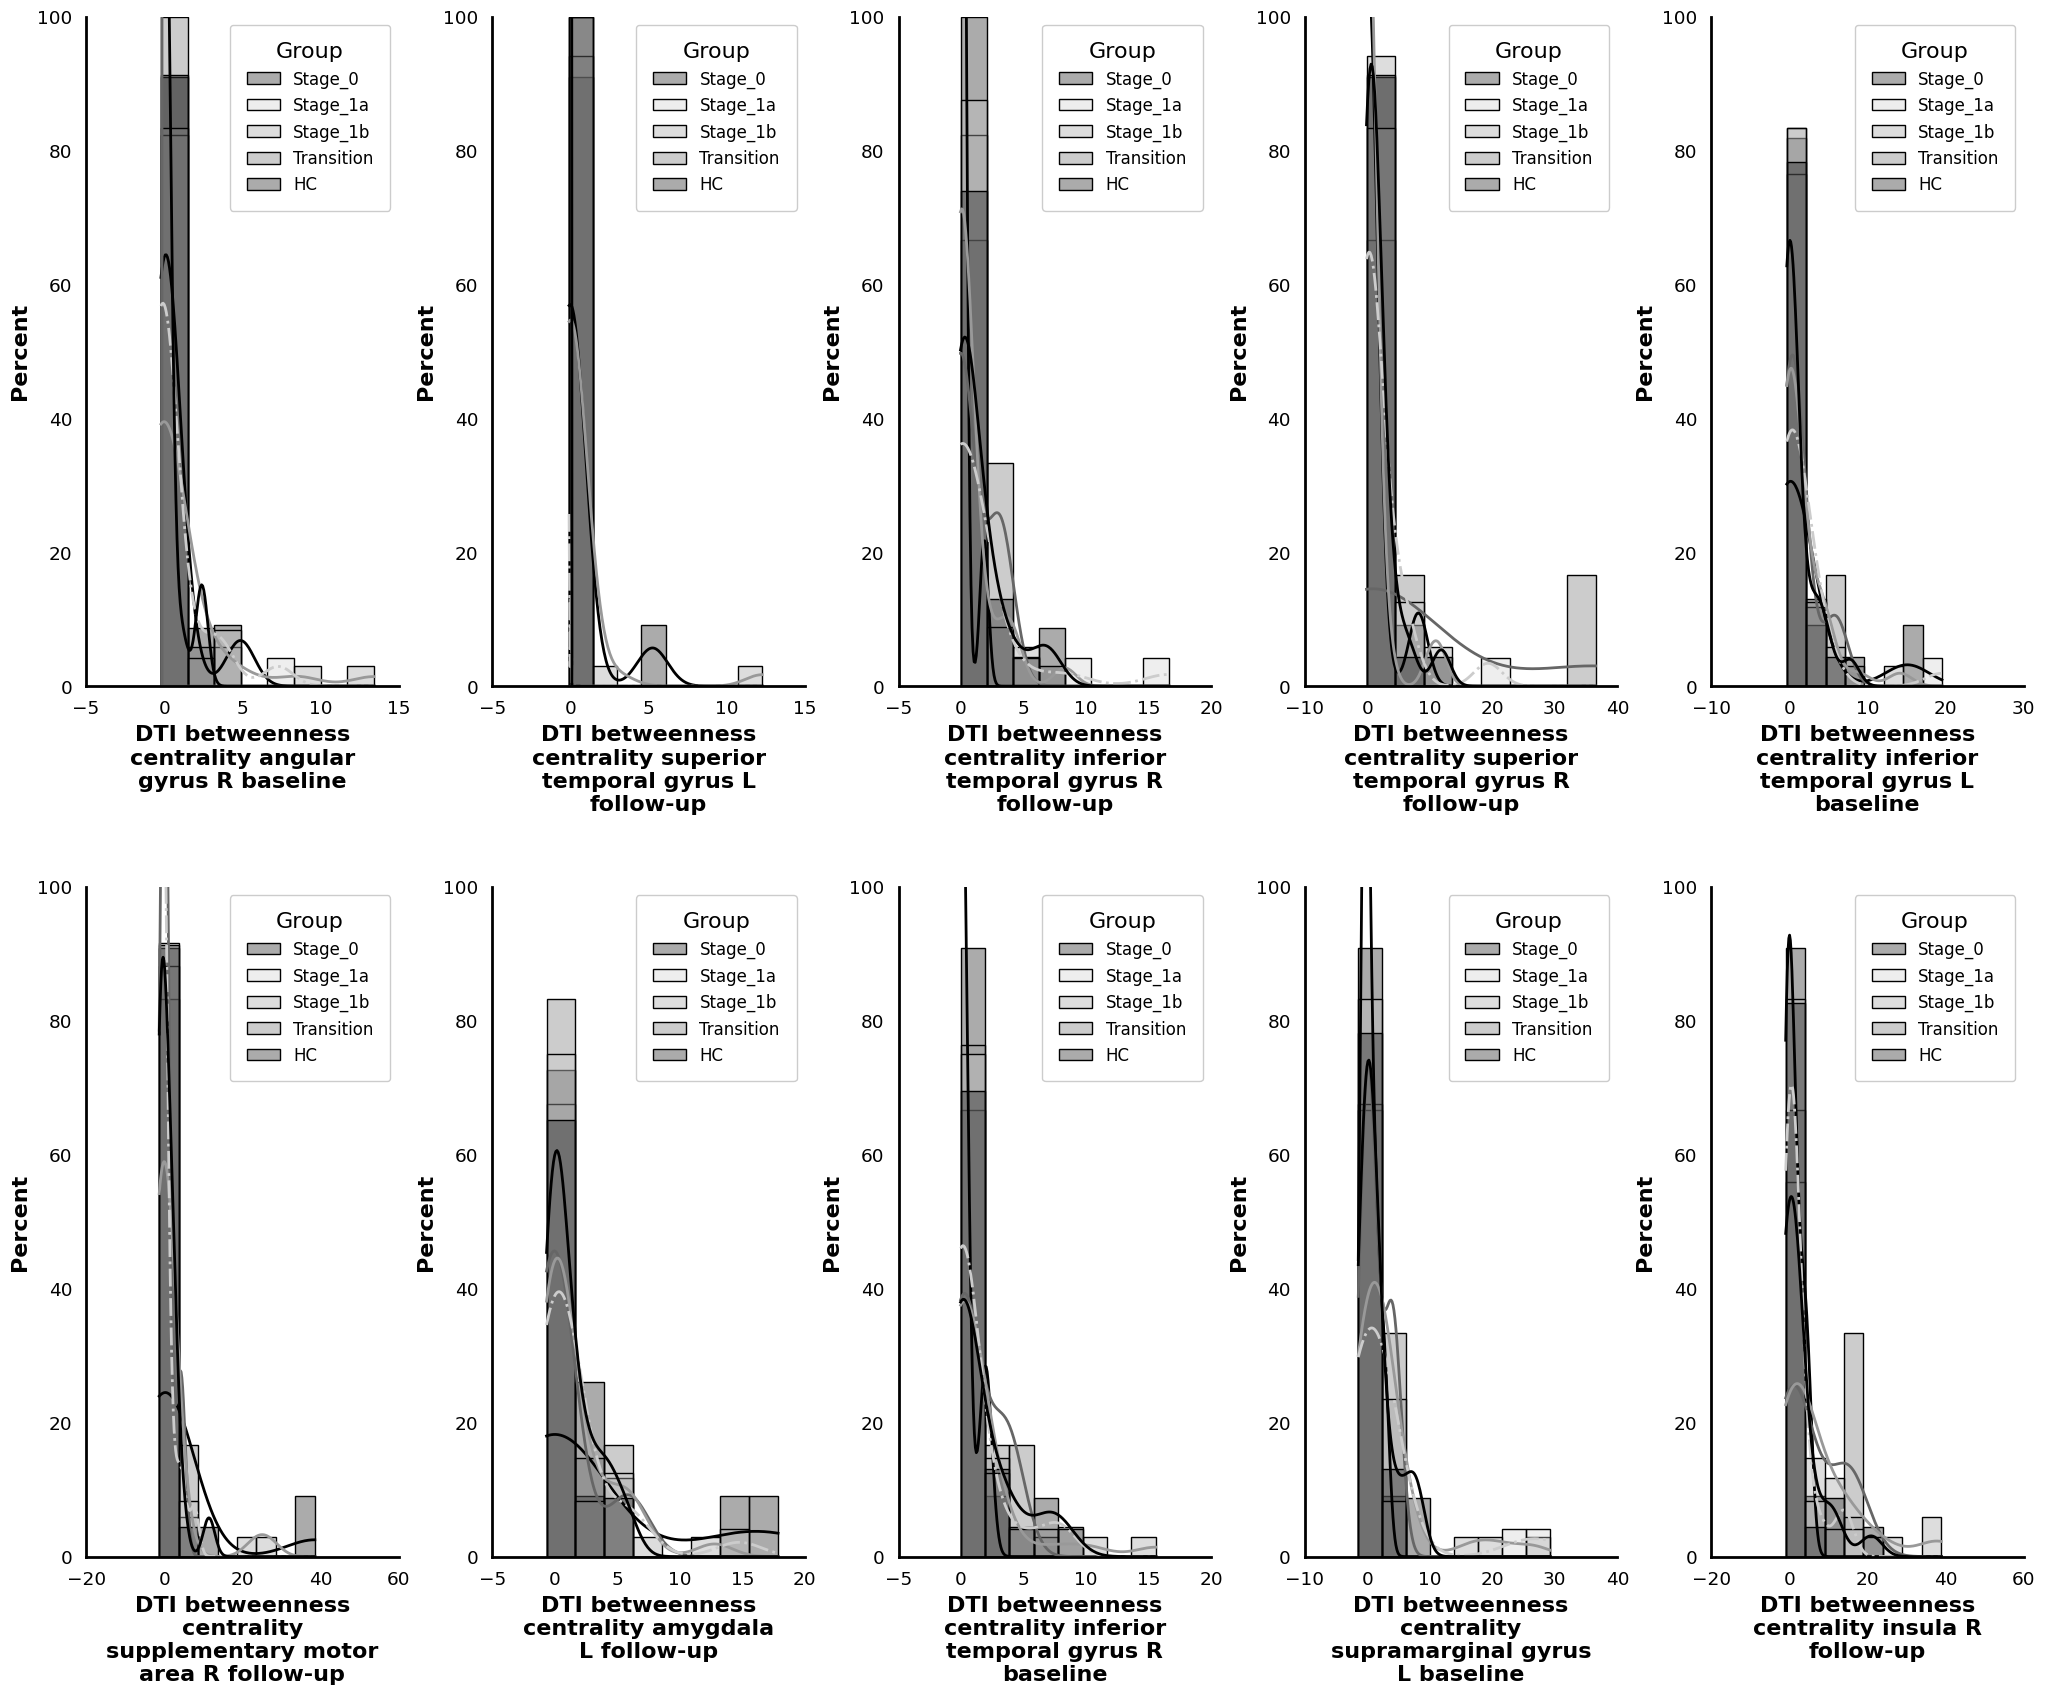

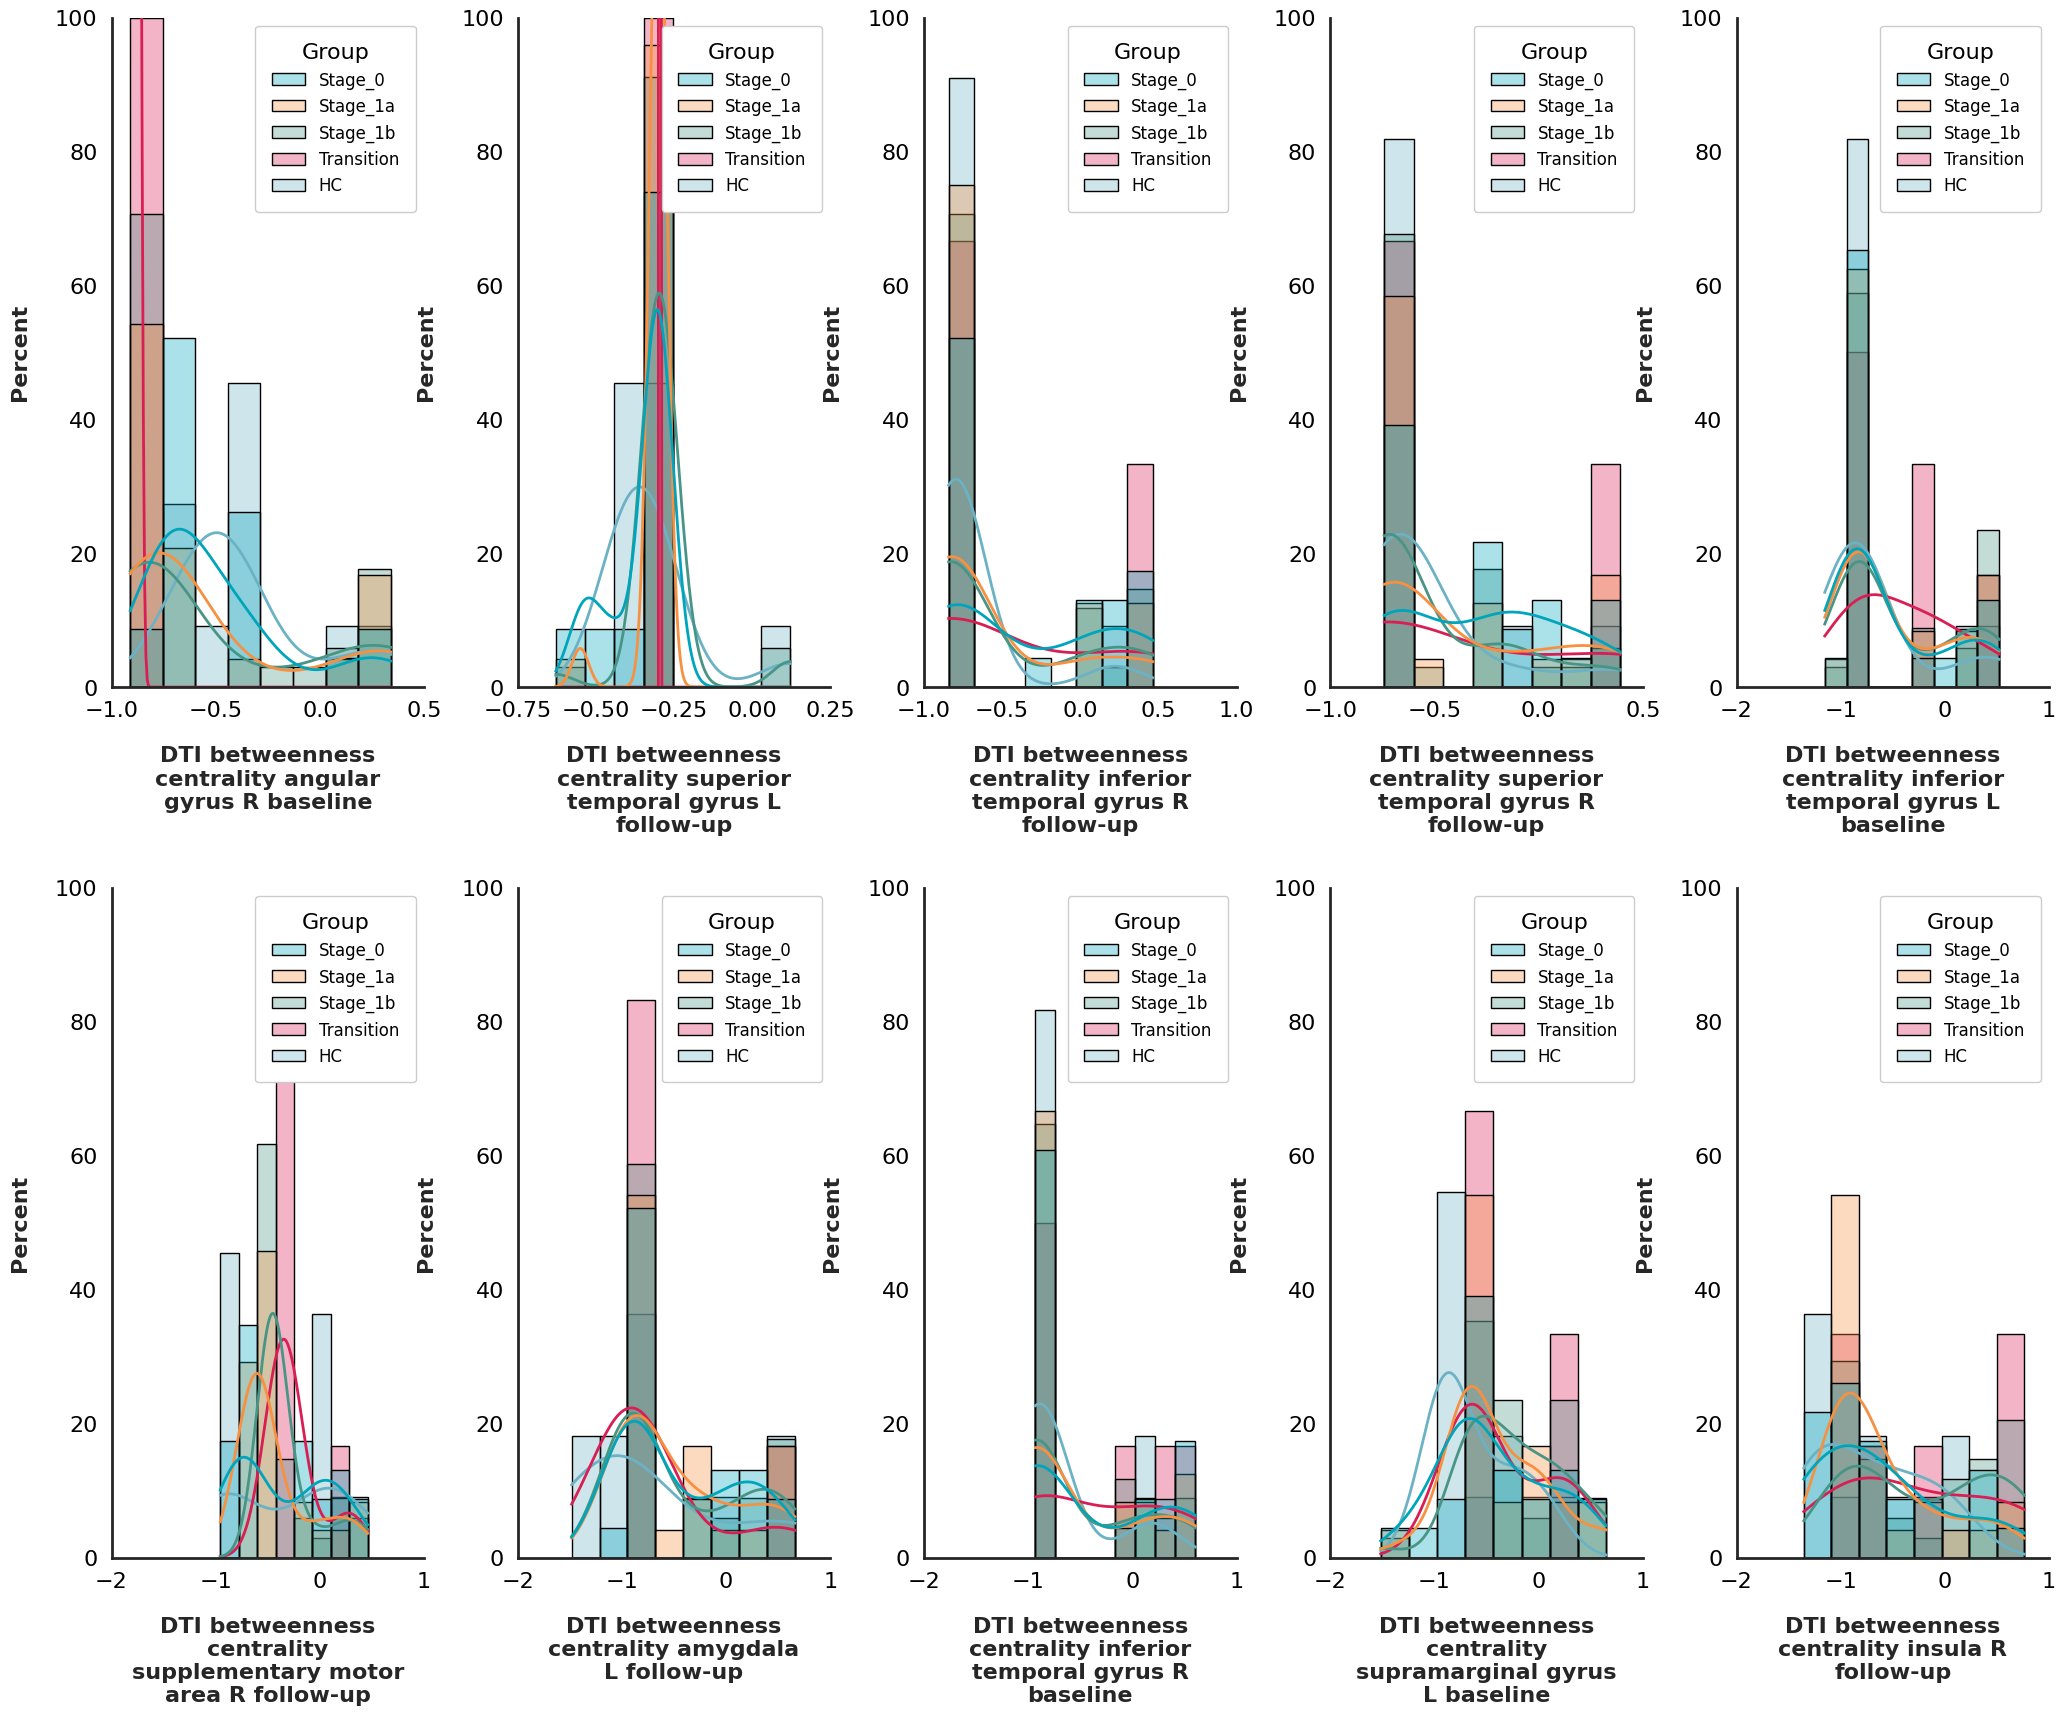

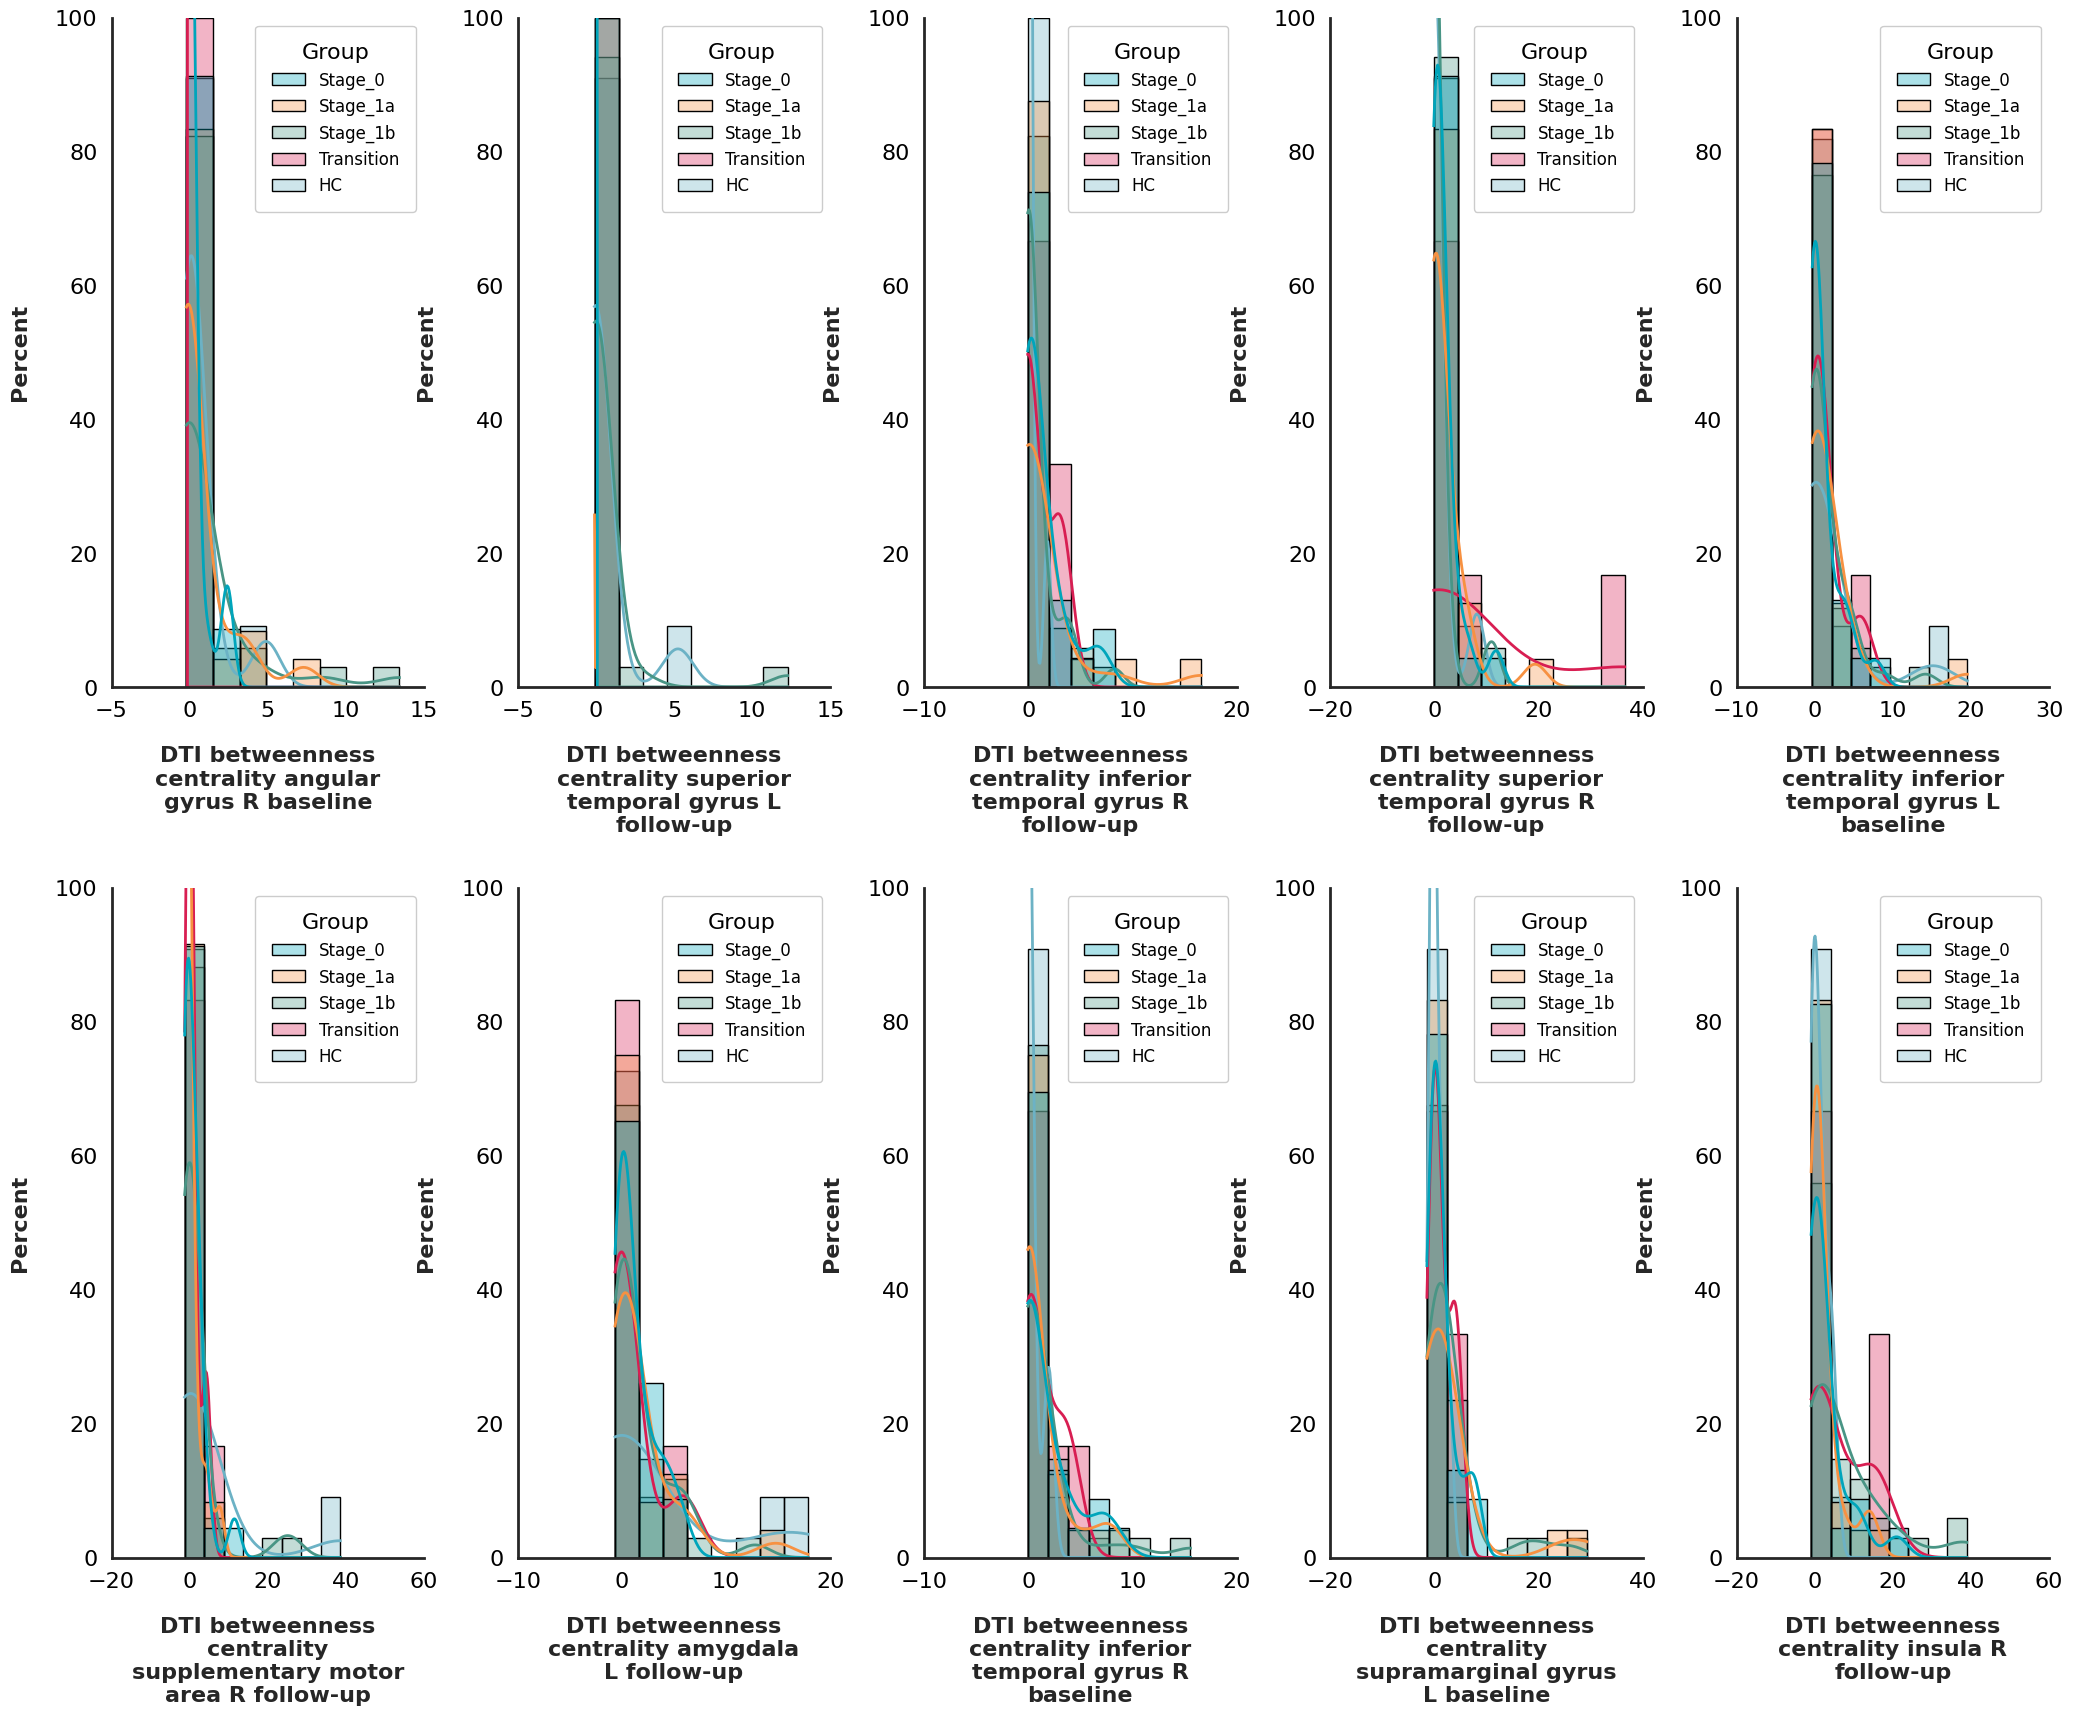

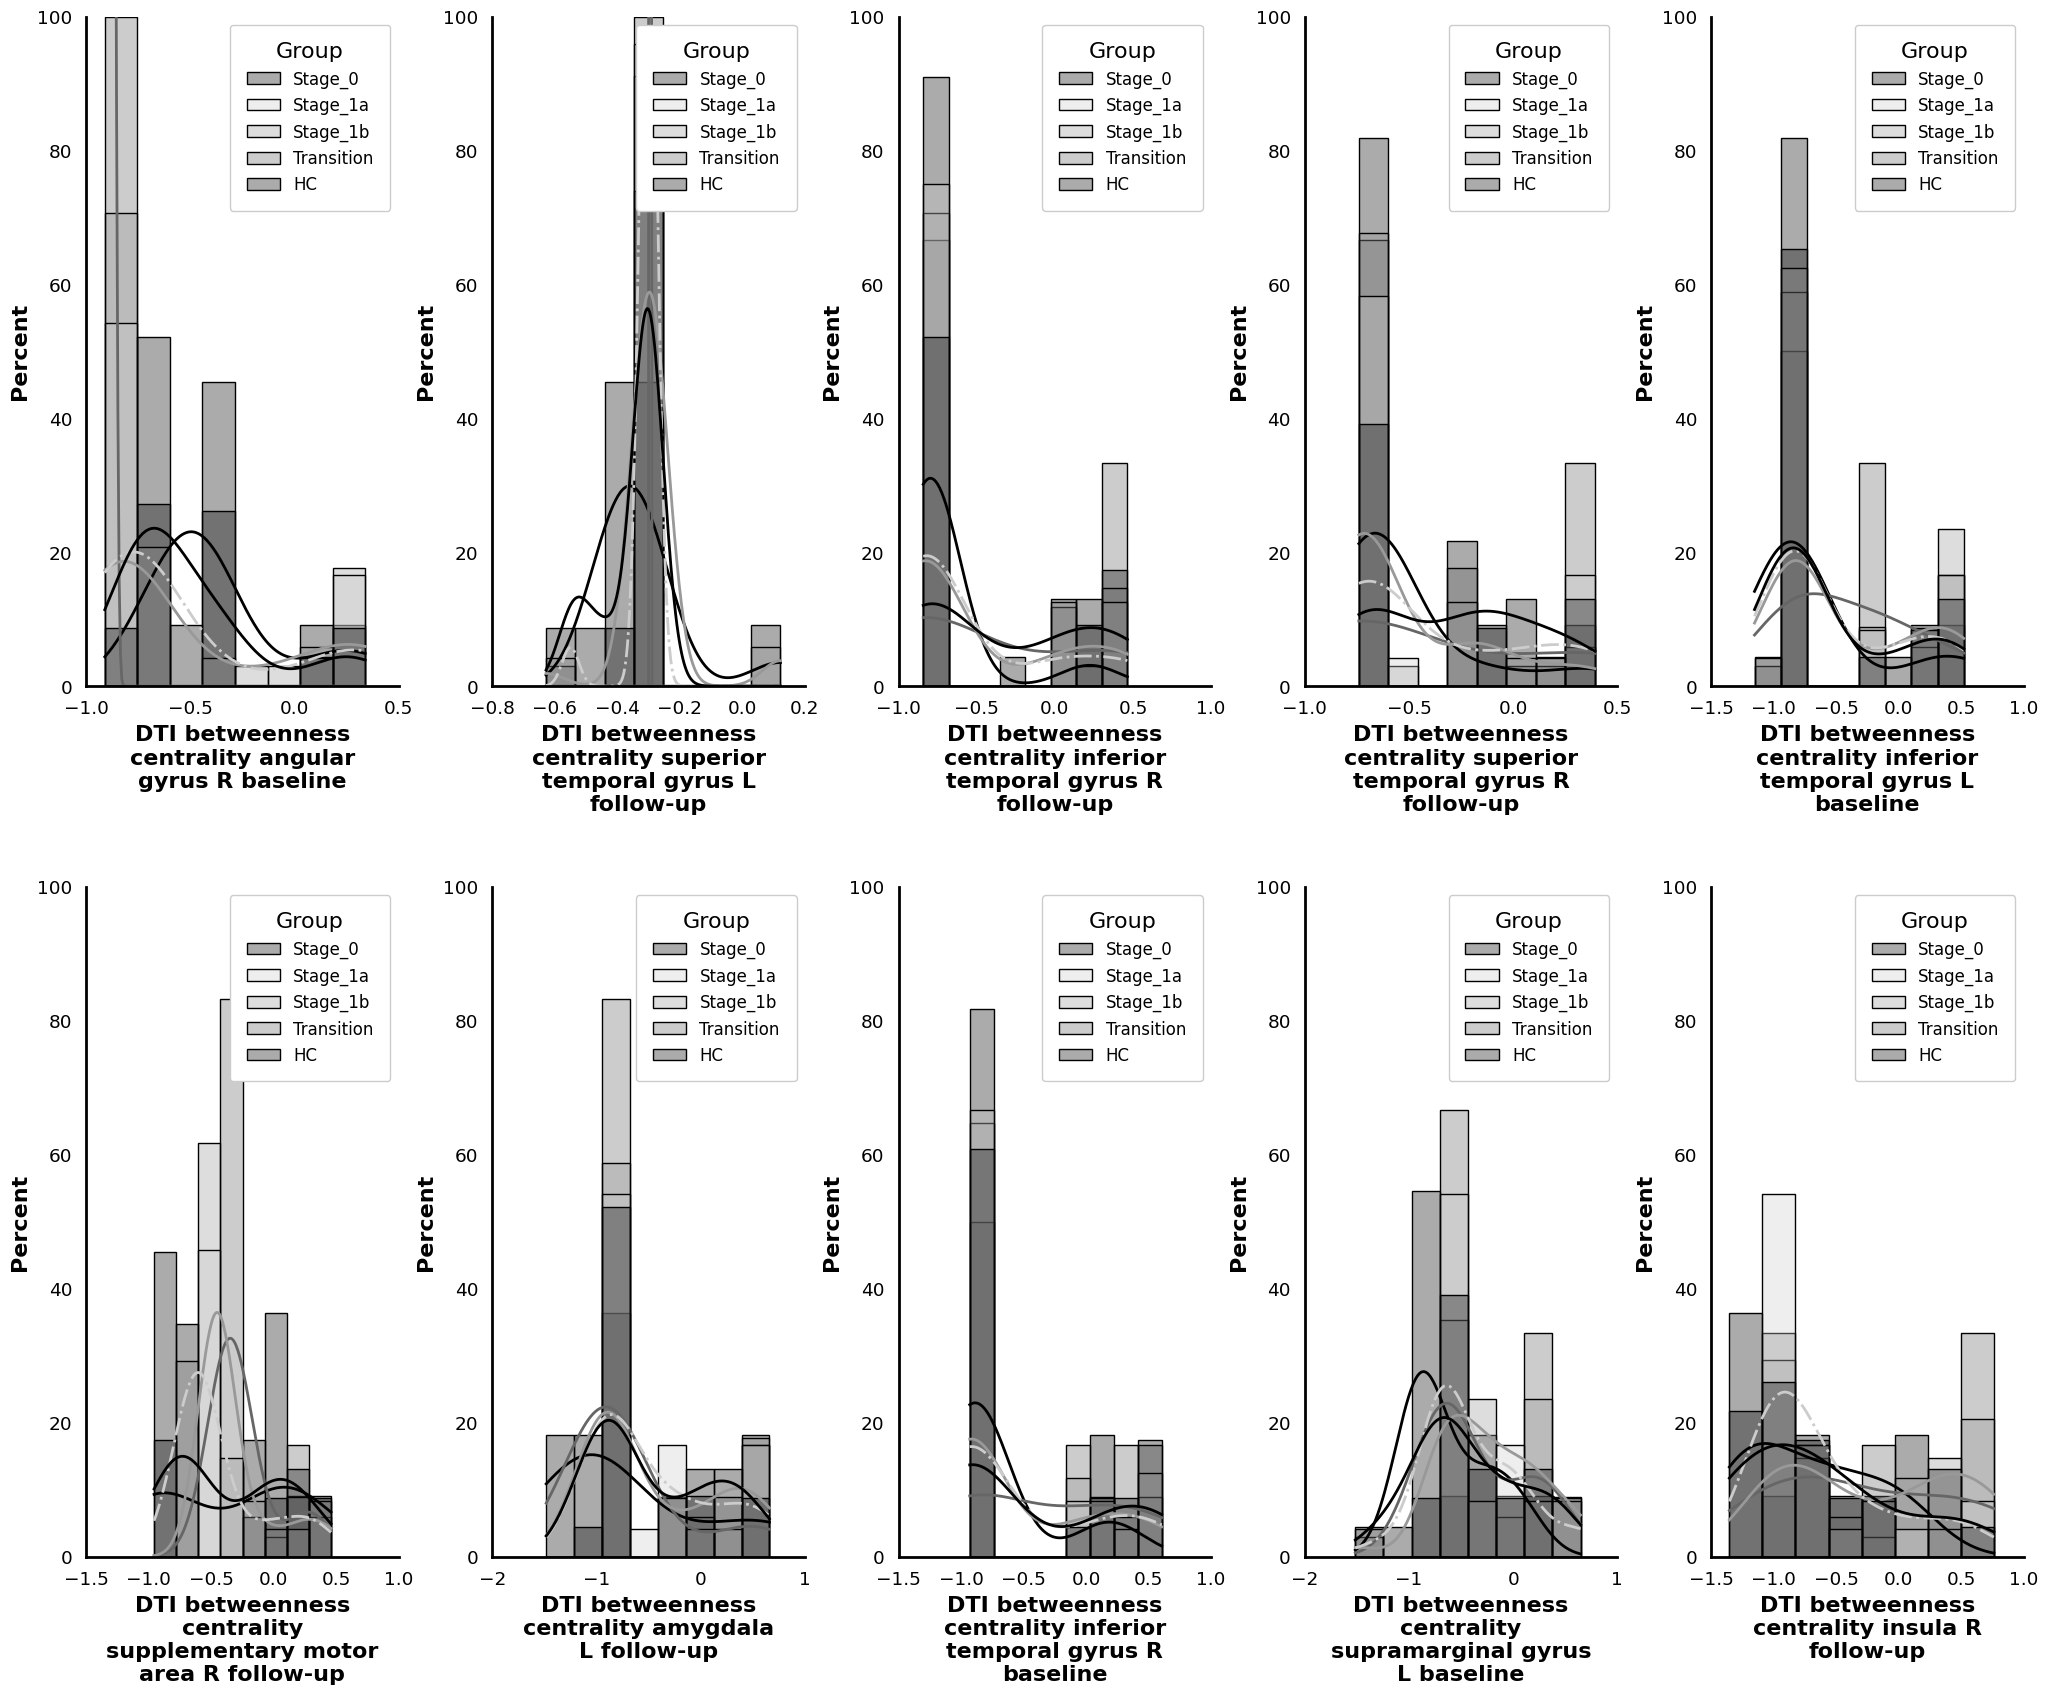

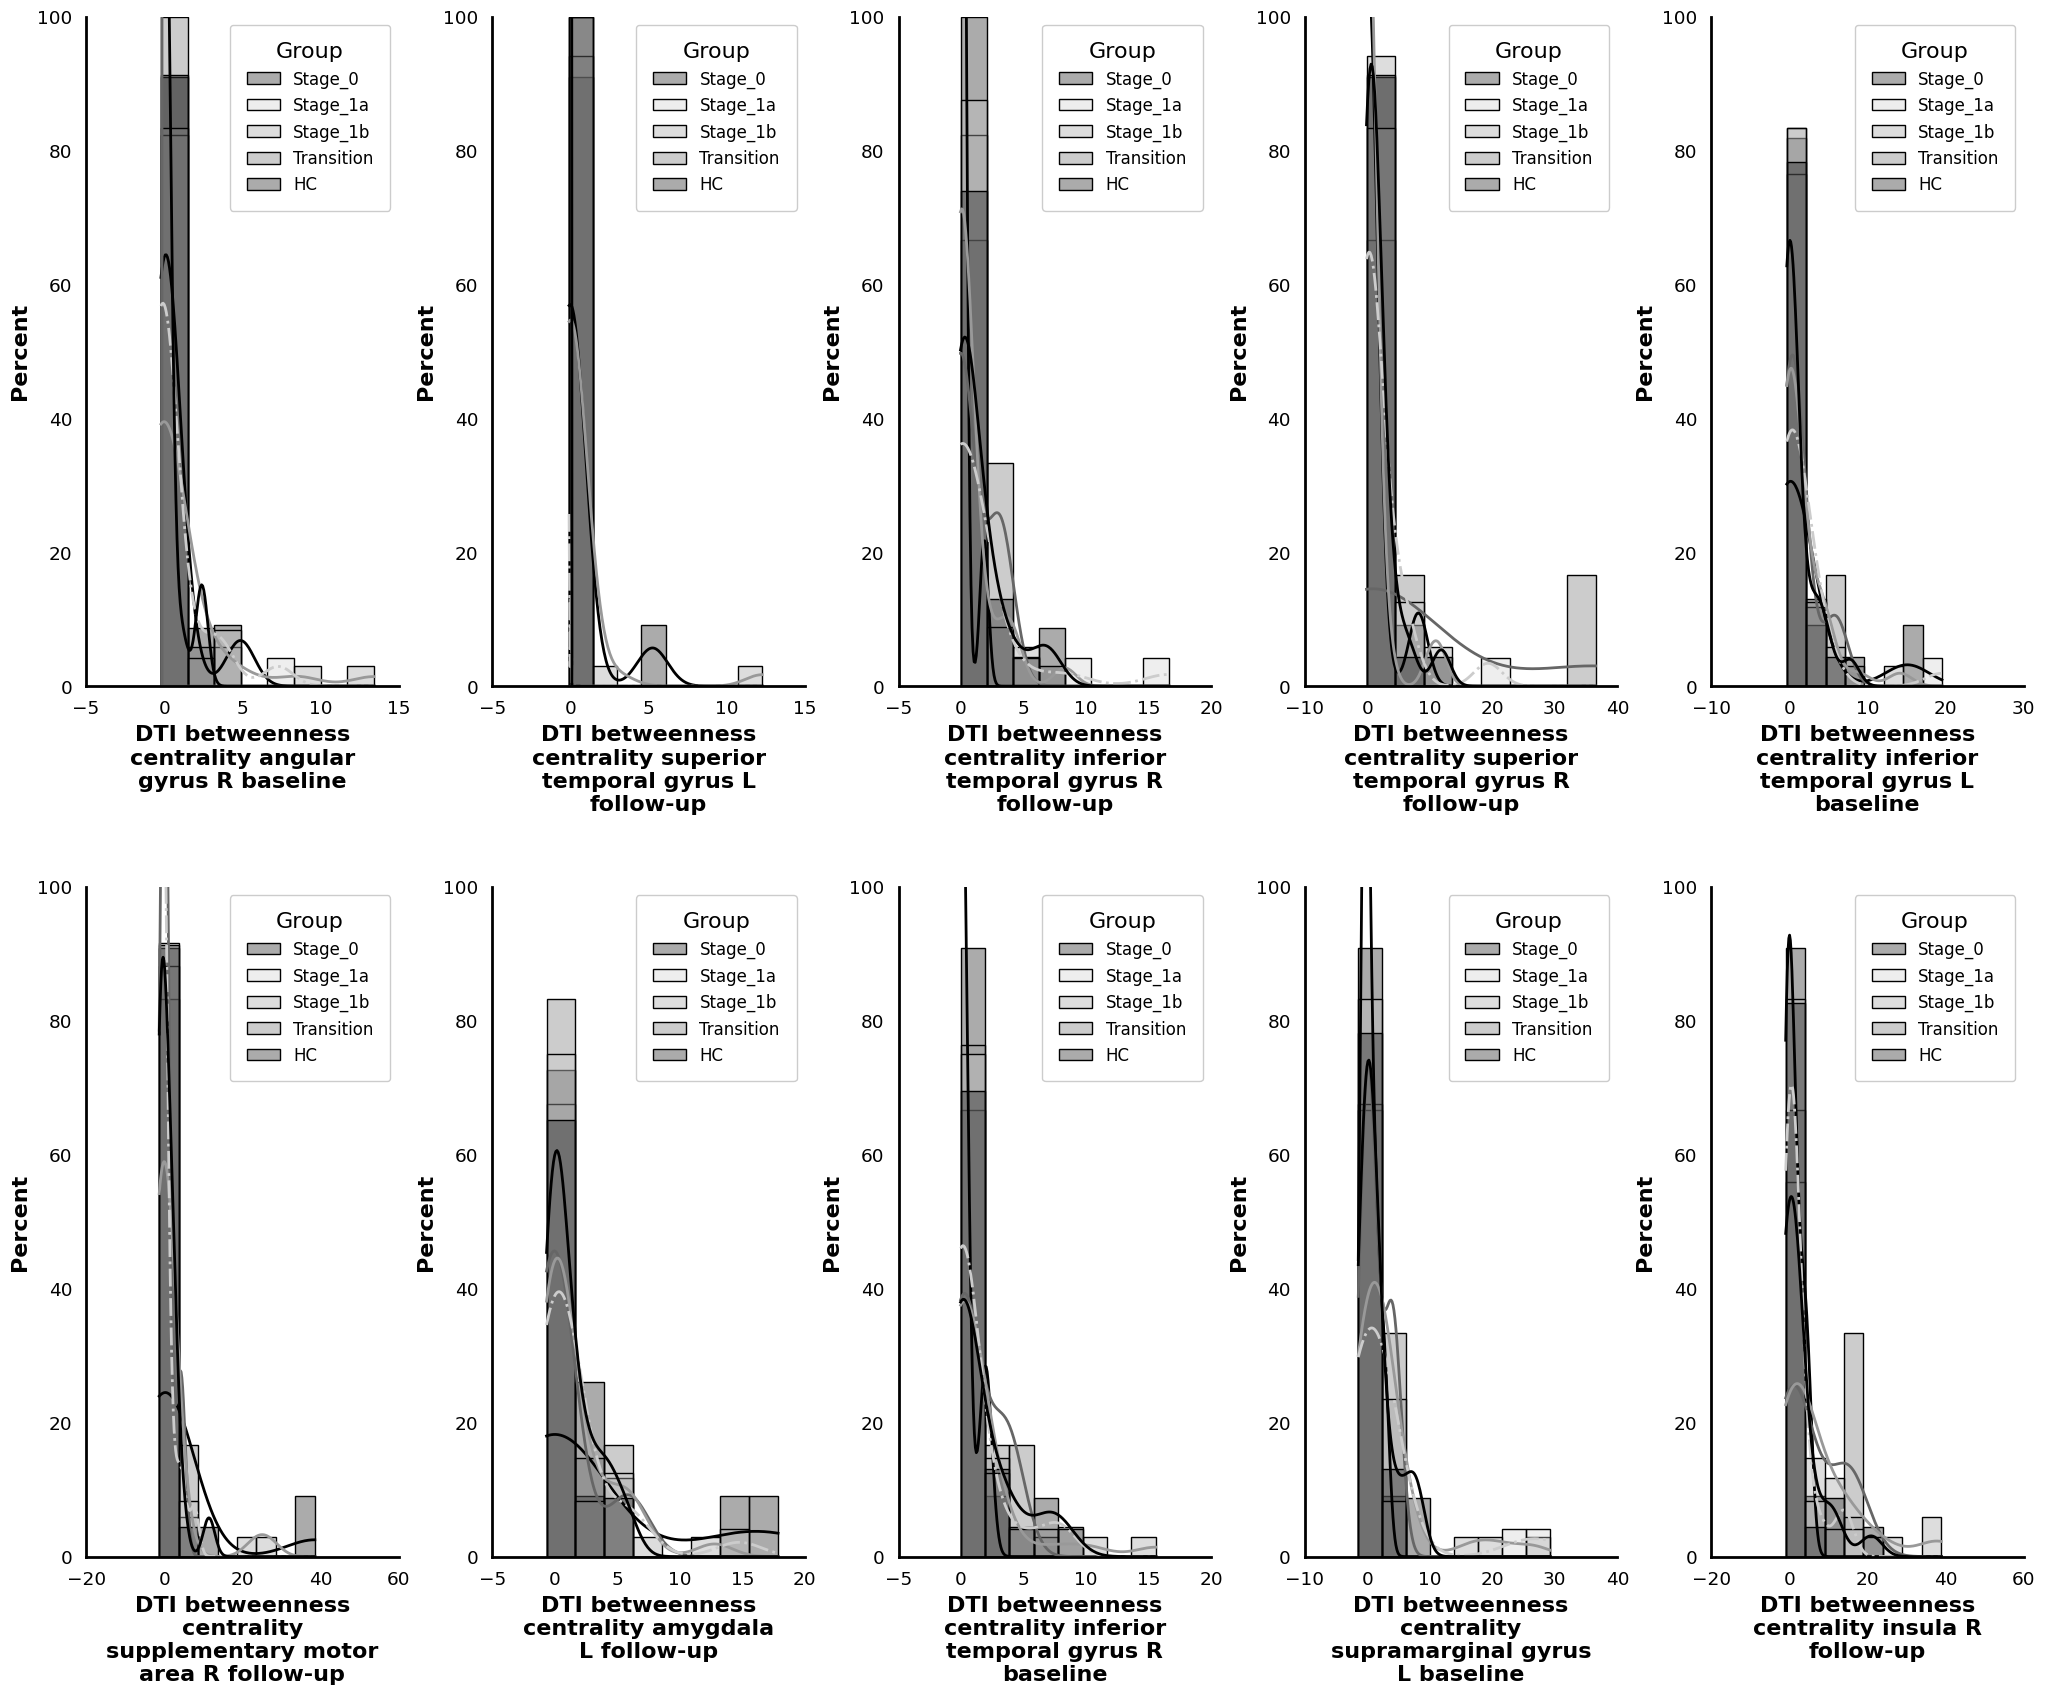

In [33]:
import seaborn as sns


def plot_feature_hist(data, features, style_sheet="../plots/plt_plot_style.mplstyle", fig_name="transformed-feature-histograms"):
    plt.style.use(style_sheet)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,20))
    flat_axes = []

    for ax in axes:
        for a in ax:
            flat_axes.append(a)
    for f,ax  in list(zip(features, flat_axes)):
        sns.histplot(
            data=data,
            x=f,
            hue="Group",
            kde=True,
            stat="percent",
            ax=ax,
            multiple="layer",
            bins=8,
            common_norm=False,
            common_bins=True,
            element="bars",
            alpha=0.33,
            line_kws={'linewidth': 2},
            kde_kws={"cut":0, "cumulative": True})
        ax.set_ylim(0,100)
    # plt.ylim(0, 100)
    # fig.show()
    fig.savefig(_PLOT_PATH / f"{fig_name}.svg", bbox_inches="tight")
    fig.savefig(_PLOT_PATH / f"{fig_name}.pdf", bbox_inches="tight")
    return fig

plot_df = df.copy(deep=True)
plot_df["Group_idx"] = plot_df["Group"]
plot_df["Group"] = plot_df["Group_idx"].map(cfg.labels_dict)
n_m = {c: feature_name_map(c) for c in plot_df.columns}

hist_feature_mapper = lambda x: feature_name_map(x, wrap_len=20)

feature_importances_df = (
                model.importances_.fillna(0).mean(axis=1).rename("Importance")
            )
feature_importances_df = feature_importances_df.rename(hist_feature_mapper)
top_10_features=feature_importances_df.sort_values(ascending=False)[:10].index
plot_df= plot_df.rename(columns=hist_feature_mapper)
df_T = df_T.rename(columns=hist_feature_mapper)


plot_feature_hist(df_T, top_10_features)
plot_feature_hist(plot_df, top_10_features, fig_name="raw-feature-histograms")
plot_feature_hist(df_T, top_10_features, fig_name="transformed-feature-histograms-apa", style_sheet="../plots/apa_plot_style.mplstyle")
plot_feature_hist(plot_df, top_10_features, fig_name="raw-feature-histograms-apa", style_sheet="../plots/apa_plot_style.mplstyle")


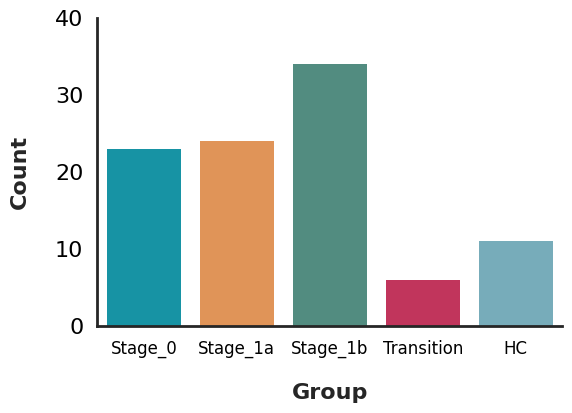

In [34]:
plt.style.use("../plots/plt_plot_style.mplstyle")
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=plot_df["Group"], ax=ax) #, color=sns.color_palette()[0], ax=ax)
ax.set_ylabel("Count")
plt.xticks(fontsize=12)
fig.savefig(_PLOT_PATH / "label-counts.pdf", bbox_inches="tight")
fig.savefig(_PLOT_PATH / "label-counts.svg", bbox_inches="tight")

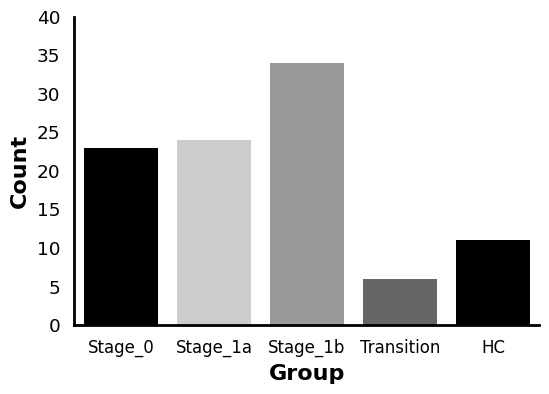

In [35]:
plt.style.use("../plots/apa_plot_style.mplstyle")
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x=plot_df["Group"], ax=ax) #, color=sns.color_palette()[0], ax=ax)
ax.set_ylabel("Count")
plt.xticks(fontsize=12)
fig.savefig(_PLOT_PATH / "apa-label-counts.pdf", bbox_inches="tight")
fig.savefig(_PLOT_PATH / "apa-label-counts.svg", bbox_inches="tight")

In [36]:
best_params = []
for m in [model, model_2078, model_8746]:
    best_params.extend(m.best_params_)
len(best_params)

294

In [37]:
card = df.apply(pd.Series.unique).apply(len).value_counts()
display(card.head())
2380/df.shape[1]


98    2380
97     115
95      53
93      37
96      35
dtype: int64

0.8759661391240339

In [38]:
card.loc[card.index>90].sum() / df.shape[1]

0.9878542510121457

In [39]:
params_df = pd.DataFrame(best_params)
params_df.apply(pd.Series.value_counts)

,class_weight,criterion,min_samples_leaf,min_samples_split,n_estimators
1,NaN,NaN,294.0,NaN,NaN
2,NaN,NaN,NaN,118.0,NaN
3,NaN,NaN,NaN,82.0,NaN
5,NaN,NaN,NaN,94.0,NaN
50,NaN,NaN,NaN,NaN,148.0
100,NaN,NaN,NaN,NaN,69.0
200,NaN,NaN,NaN,NaN,43.0
400,NaN,NaN,NaN,NaN,21.0
600,NaN,NaN,NaN,NaN,13.0
balanced,197.0,NaN,NaN,NaN,NaN
